In [ ]:
# Imports
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Figure 1: Adding cooperativity to protien concentration equation.

The equation $\large \frac{dx_{2}(t)}{dt}=\frac{\beta_{2}}{1+\frac{x_{2}^{n}}{k^{n}}}-\alpha x_{2}$ represents the dynamics negative autoregulatory circuit  that has a degradation term and a production term. $\beta_{2}$ is the maximum production rate, $x_{2}$ represents the concentration of protein, k is the disscoiation constant of the repressor to its promotor, -$\alpha x_{2}$ is the degration rate of the protein, and n is the hill coeffcient.  The hill coeffcient is the degree of cooperativity in the regulation of gene expression.

When n=1 it suggests no cooperativitity, however, the literature suggests that cooperativity in autorepression the repression of a transcription factor's own promotor can further decrease the rise time.

For the first figure, the dynamics for a protein are represented with a hill coeffcient of n=1 suggesting no copperativity, alongside protein concentration rates with cooperativity levels of n=2 and n=3.  Alongside these plots are the steady state rates for positive and negative

In [ ]:
def Calcuate_Protein_Concentration(x, beta, alpha, k, n):
    # The production rate of protien
    positive = beta / (1 + (x**n/k**n))
    # The degredation rate of protein
    negative = alpha * x
    # Return production rate of protein (postive), and the degration rate of protein (negative)
    return positive, negative

In [ ]:
def Plot_Protein_Concentration(x, positive, negative, title):
    # Create plot for protien concentration vs rates
    plt.title(title)
    plt.plot(x,positive,'orangered')
    plt.plot(x,negative,'blueviolet')
    plt.xlabel('Protein Concentration (x)')
    plt.ylabel('Rates')
    plt.legend(['Positive (Protein Production)','Negative (Protein Degradation)'])
    plt.xlim(0,2)
    plt.ylim(0,2)
    plt.grid()

In [ ]:
# Parameters
x =  np.linspace(0,10,100) # Protein Concentration
k = 2 # Dissociation constant of the repressor to its own promotor
beta = 1 # maximum production rate
alpha = 0.15 # alpha=ln(2)/ cell cycle time

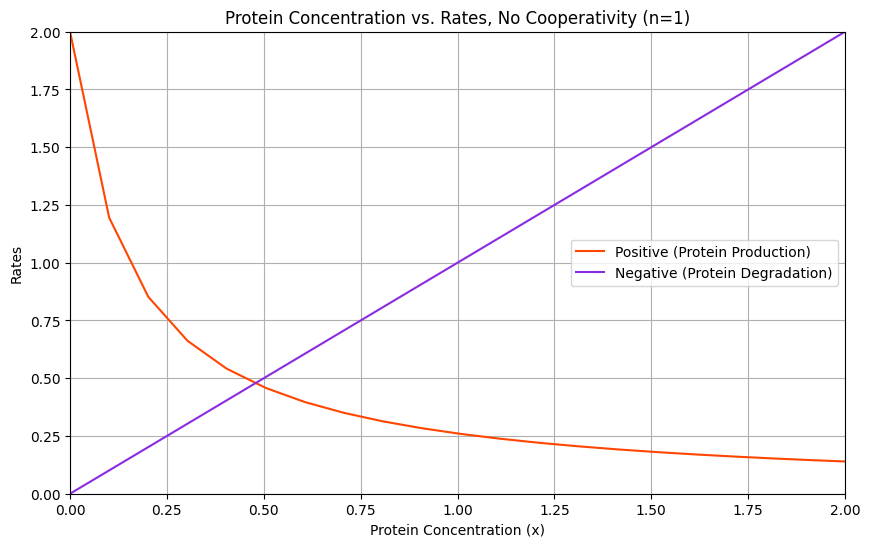

In [ ]:
# Calculate and plot protein concentration with no cooperativity (n=1)
positive, negative = Calcuate_Protein_Concentration(x, k, beta, alpha,n=1)
# Create figure 1
plt.figure(1, figsize=(10,6))
# plot n=1 protien concentration vs rates
Plot_Protein_Concentration(x, positive, negative, title = 'Protein Concentration vs. Rates, No Cooperativity (n=1)')

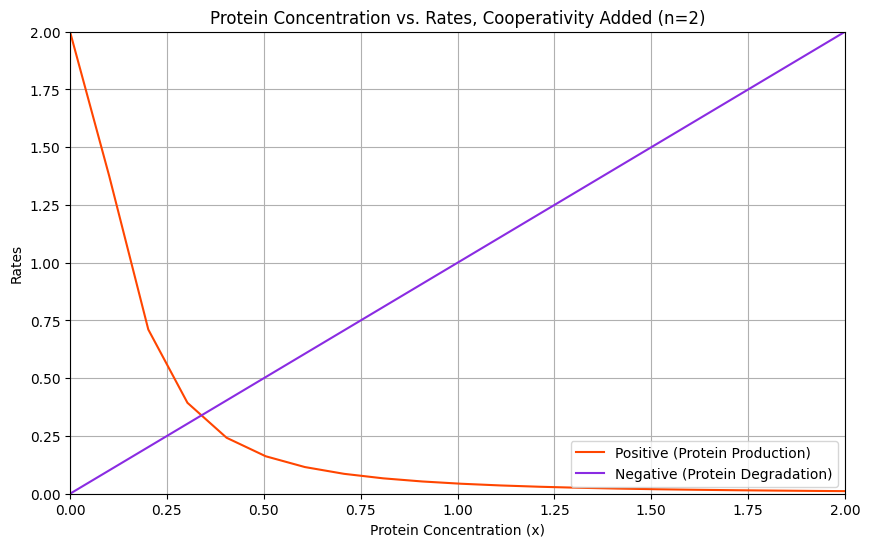

In [ ]:
# Calcualte and plot protein concentration with cooperativity (n=2)
positive, negative = Calcuate_Protein_Concentration(x, k, beta, alpha,n=2)
# Plot figure
plt.figure(2, figsize=(10,6))
# plot n=2 protien concentration vs rates
Plot_Protein_Concentration(x, positive, negative, title='Protein Concentration vs. Rates, Cooperativity Added (n=2)')

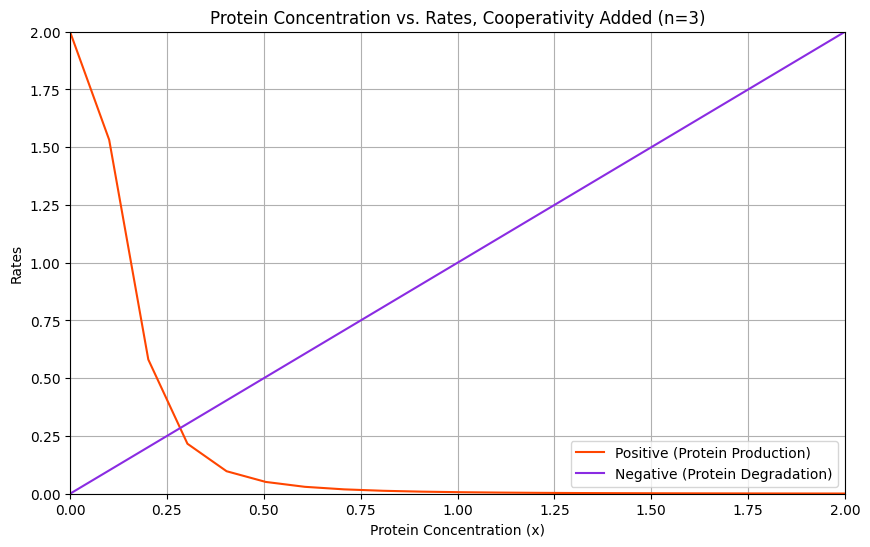

In [ ]:
# Calcualte and plot protein concentration with cooperativity (n=3)
positive, negative = Calcuate_Protein_Concentration(x, k, beta, alpha,n=3)
# Plot figure
plt.figure(3, figsize=(10,6))
# plot n=3 protien concentration vs rates
Plot_Protein_Concentration(x, positive, negative, title='Protein Concentration vs. Rates, Cooperativity Added (n=3)')

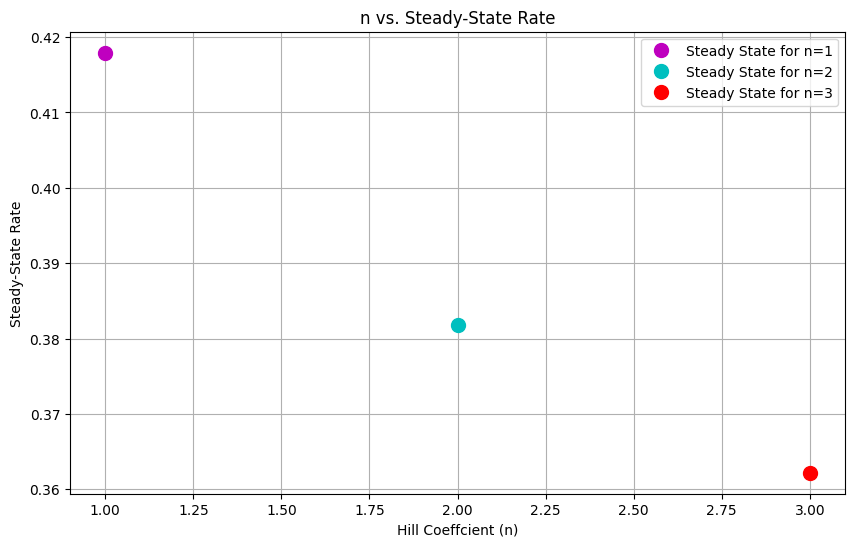

In [ ]:
# Plot n vs steady state
# Steady states for n=1, n=2, and n=3
steady_states = np.array([0.417922, 0.3818055625, 0.3622])
# Range of n values
n_values = np.arange(1, 4)
# colors
colors = ['mo','co','ro']

# Create figure
plt.figure(4, figsize=(10, 6))
# plot n vs steady states
for i in range(len(steady_states)):
    plt.plot(n_values[i], steady_states[i], colors[i], label=f'Steady State for n={n_values[i]}', markersize=10)
# Annotate grpah
plt.title('n vs. Steady-State Rate') # title
plt.xlabel('Hill Coeffcient (n)')
plt.ylabel('Steady-State Rate')
plt.grid()
plt.legend()
plt.show()

## Figure 2: Plot Neumerical rise time

Figure 2 plots the neumerical rise time against protein concentration vs time for n=1, n=2, and n=3.  Rise time is the delay from initiation of protein production until half the maximal protien concentration is reached in a transcription unit.  Rise time is calculated with the equation $t_{r}=t(\frac{x_{1}^{st}}{2})-t(0)$ from solving an ordianry differential equation describing the dynamics negaive autoregulation and calculating the steady state protein concentration.  Here, the steady state when there is no cooperativity (n=1) is calculated with $x_{st}=\dfrac{\sqrt{k^{2}+4( \dfrac{\left( k\right) \left( \beta _{2}\right) }{a}}-k}{2}$ and the steady states when there is cooperativity (n=2 and n=3) have been pulled manually from the protein concentration graphs.


In [ ]:
def Negative_Autoregulation_Dynamics(time, protein_y, beta_2 ,k, tau, tau_deg, n):
    # Calculate Negative autoregulation dynamics
    alpha = np.log(2) * (1/tau+1/tau_deg)
    A = beta_2/(1 + protein_y**n/k**n)
    dydt = A - alpha * protein_y

    # Return Steady State
    return dydt

In [ ]:
def Plot_Neumerical_Rise_Time(time, solved_ode_sol, neumerical_rise_time, x_steady_state, title):
    plt.plot(time, solved_ode_sol,'k-')
    plt.plot([neumerical_rise_time,neumerical_rise_time],[0,x_steady_state],'m--')
    plt.title(title)
    plt.xlabel('time')
    plt.ylabel('protein concentration')
    plt.legend(['Protein','Rise-Time (Estimate)'])
    plt.grid()

In [ ]:
# Parameters
tau = 1 # [1/time]
tau_deg = 1000 # [1/time] start with a high number to assume no degradation
k = 1 # Dissociation constant of the repressor to its own promotor
alpha = np.log(2)*(1/tau+1/tau_deg)
beta_2 = 10 # [conc/time]

# Initial Conditions
y0 = [0]

# time span
time = np.linspace(0,10,1000)
time_span = [time[0],time[-1]]

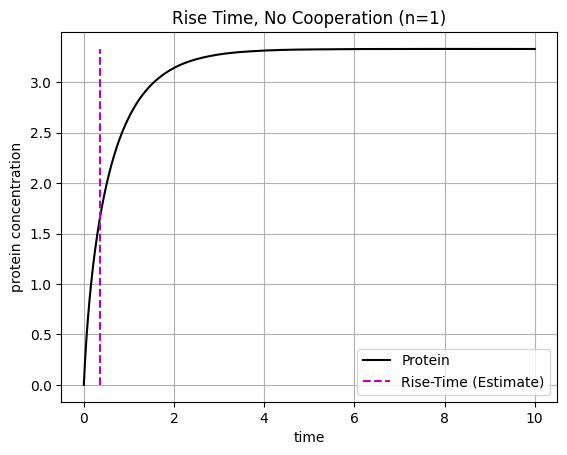

In [ ]:
# Solve differential equation for n=1
ode_sol = solve_ivp(lambda time, protein_y: Negative_Autoregulation_Dynamics(time, protein_y, beta_2, k, tau, tau_deg, n=1), time_span, y0, t_eval=time)
solved_ode_sol = ode_sol.y[0]

# Steady-state and rise-time (Analytics) for n=1
x_steady_state = (np.sqrt(k**2+4*(k*beta_2/alpha))-k)/2

# Rise-time estimation
neumerical_rise_time = time[np.argmin(np.abs(ode_sol.y[0]-x_steady_state/2))] #estimate rise-time by finding point in dynamics where protein concentration is closest to half of steady-state

# Plot figure for neumerical rise time when n=1
plt.figure(5)

Plot_Neumerical_Rise_Time(time, ode_sol.y[0], neumerical_rise_time, x_steady_state, title = "Rise Time, No Cooperation (n=1)")

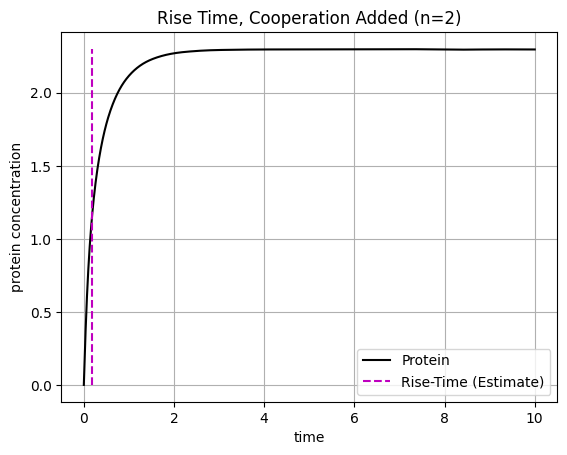

In [ ]:
# Solve differential equation for n=2
ode_sol = solve_ivp(lambda time, protein_y: Negative_Autoregulation_Dynamics(time, protein_y, beta_2, k, tau, tau_deg, n=2), time_span, y0, t_eval=time)

# Steady-state and rise-time (Analytics) for n=
x_steady_state = 2.3

# Rise-time estimation
neumerical_rise_time = time[np.argmin(np.abs(ode_sol.y[0]-x_steady_state/2))] #estimate rise-time by finding point in dynamics where protein concentration is closest to half of steady-state

# Plot figure for neumerical rise time when n=2
plt.figure(6)
Plot_Neumerical_Rise_Time(time, ode_sol.y[0], neumerical_rise_time, x_steady_state, title = "Rise Time, Cooperation Added (n=2)")

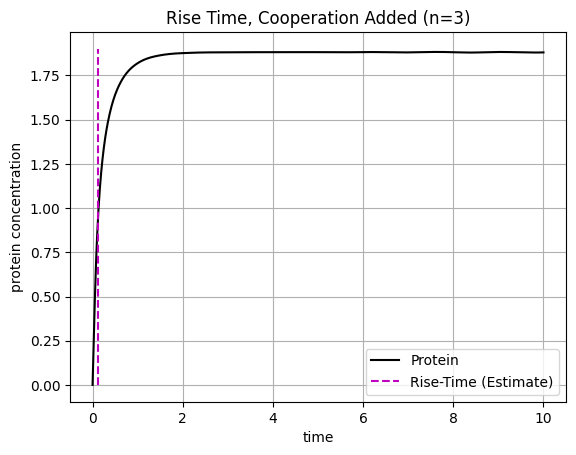

In [ ]:
# Solve differential equation for n=3
ode_sol = solve_ivp(lambda time, protein_y: Negative_Autoregulation_Dynamics(time, protein_y, beta_2, k, tau, tau_deg, n=3), time_span, y0, t_eval=time)

# Steady-state and rise-time (Analytics) for n=3
x_steady_state = 1.9

# Rise-time estimation
neumerical_rise_time = time[np.argmin(np.abs(ode_sol.y[0]-x_steady_state/2))] #estimate rise-time by finding point in dynamics where protein concentration is closest to half of steady-state

# Plot figure for neumerical rise time when n=3
plt.figure(7)
Plot_Neumerical_Rise_Time(time, ode_sol.y[0], neumerical_rise_time, x_steady_state, title = "Rise Time, Cooperation Added (n=3)")

## Figure 3: Plot Alpha vs rise time

Figure 3 plots alpha vs neumerical rise time for n=1, n=2, and n=3 at 8 different alpha values between 0 and 0.7  The same methods for figure 2 were used to calculate the neumerical rise time, except to find the steady states when cooperativitity is added.  The equation $x_{st}=\dfrac{x\left( t\right) }{\left( 1-e^{-\left( n+1\right) at}\right) ^{\dfrac{1}{n+1}}}$ from Rosenfeld et al. calculates the steady state when cooperativity is included.  The used for $x\left( t\right)$ in this equation is the steady state concentration that was found manually from figure 2.

In [ ]:
def Negative_Autoregulation_dynamics_2(time, protein_y, beta_2, k, tau, tau_deg, alpha, n):
    # Calculate Negative autoregulation dynamics
    A = beta_2 / (1 + (protein_y / k)**n)
    dydt = A - alpha * protein_y
    # Return dynamics
    return dydt

In [ ]:
def Calculate_Rise_Times(tau, tau_deg, k, beta_2, y0, time, time_span, alpha_values, n, inital_xst_concentration):
    rise_times = []
    # Solve differential equation for each alpha value
    for alpha in alpha_values:
        ode_sol = solve_ivp(lambda time, y: Negative_Autoregulation_dynamics_2(time, y, beta_2, k, tau, tau_deg, alpha, n), time_span, y0, t_eval=time)
        # Calculate rise time
        if n>1:
            exponent = -(n + 1) * alpha * time
            not_zero = 1e-10  # add small value so it does not divide by 0
            denominator = (1 - np.exp(exponent)) ** (1 / (n + 1)) + not_zero
            # Calculate the steady-state concentration
            x_steady_state = inital_xst_concentration / denominator
        else:
            x_steady_state = (np.sqrt(k**2+4*(k*beta_2/alpha))-k)/2

        # Calculate rise-time as 1/2 steady state protein concentration
        rise_time = time[np.argmin(np.abs(ode_sol.y[0] - x_steady_state / 2))]
        # Add rise time to list
        rise_times.append(rise_time)
    # Return rise times
    return rise_times

In [ ]:
# Parameters
tau = 1 # [1/time]
tau_deg = 1000 # [1/time] start with a high number to assume no degradation
k = 1 # Dissociation constant of the repressor to its own promotor
beta_2 = 10 # [conc/time]

# Initial Conditions
y0 = [0]

# Time span
time = np.linspace(0, 10, 1000)
time_span = [time[0], time[-1]]

# Different alpha values
alpha_values = np.linspace(0.1, 0.7, 8)

In [ ]:
rise_times_n1 = Calculate_Rise_Times(tau, tau_deg, k, beta_2, y0, time, time_span, alpha_values, n=1, inital_xst_concentration=3.329169344782053) # n=1
rise_times_n2 = Calculate_Rise_Times(tau, tau_deg, k, beta_2, y0, time, time_span, alpha_values, n=2, inital_xst_concentration= 2.29) # n=2
rise_times_n3 = Calculate_Rise_Times(tau, tau_deg, k, beta_2, y0, time, time_span, alpha_values, n=3, inital_xst_concentration=1.88) # n=3

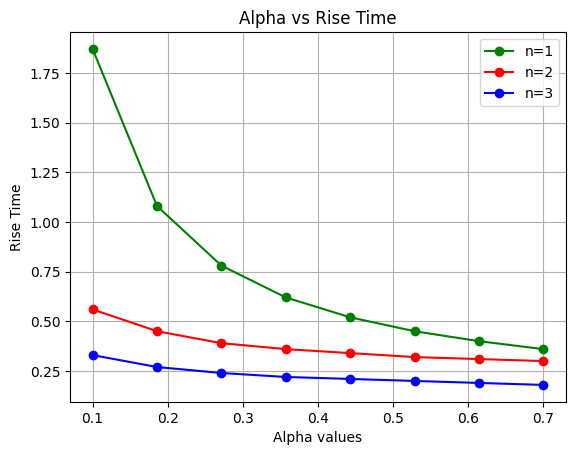

In [ ]:
# Plot alpha vs rise-time
plt.figure(8)
plt.plot(alpha_values, rise_times_n1, 'go-', label="n=1")
plt.plot(alpha_values, rise_times_n2, 'ro-', label="n=2")
plt.plot(alpha_values, rise_times_n3, 'bo-', label="n=3")
plt.xlabel('Alpha values')
plt.ylabel('Rise Time')
plt.title('Alpha vs Rise Time')
plt.legend()
plt.grid(True)
plt.show()